In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

def clean_numeric_column(col):
  """
    Limpiar columna numérica eliminando caracteres no numéricos con una expresion irregular.

    Parámetros:
    col (pd.Series): Columna a limpiar.

    Retorna:
    pd.Series: Columna limpia.
  """

  return pd.to_numeric(col.astype(str).str.replace(r'[^\d.]', '', regex=True), errors='coerce')


def detect_outliers_iqr(data, columns):
  """
  Detectar valores atípicos usando el rango intercuartílico (IQR).

  Parámetros:
  data (pd.DataFrame): DataFrame con los datos.
  columns (list): Lista de columnas a analizar.
  """

  outliers = {}
  summary = {}

  for col in columns:
      if col in data:
          clean_col = data[col].dropna()
          Q1, Q3 = clean_col.quantile([0.25, 0.75])
          IQR = Q3 - Q1
          lower_bound = Q1 - 1.5 * IQR
          upper_bound = Q3 + 1.5 * IQR

          outliers_df = data[(data[col] < lower_bound) | (data[col] > upper_bound)][[col]]
          outliers[col] = outliers_df

          # Guardar el número de valores atípicos detectados
          summary[col] = {
              "Total Valores Atípicos": len(outliers_df),
              "Porcentaje de Datos Atípicos": round((len(outliers_df) / len(data)) * 100, 2)
          }

  return outliers, summary


# Cargar el archivo CSV
df = pd.read_csv("sample_data/houses_medellin.csv")


# Columnas a limpiar y analizar
num_cols = ['Habitaciones', 'Baños', 'Estrato', 'Parqueaderos', 'Precio', 'Área construída (m²)', 'Área privada (m²)']
df[num_cols] = df[num_cols].apply(clean_numeric_column)

# Detectar valores atípicos
outliers, summary = detect_outliers_iqr(df, num_cols)

# Mostrar resultados
for col, values in outliers.items():
    print(f"Valores atípicos en {col}: {values.values.tolist()}")


Valores atípicos en Habitaciones: [[5.0], [5.0], [20.0], [5.0], [5.0], [5.0]]
Valores atípicos en Baños: [[5.0], [5.0], [5.0], [5.0], [5.0], [5.0], [5.0], [5.0], [5.0], [5.0], [5.0], [6.0], [5.0], [5.0], [5.0], [5.0], [6.0]]
Valores atípicos en Estrato: []
Valores atípicos en Parqueaderos: [[5.0], [5.0]]
Valores atípicos en Precio: [[1417743028], [1850000000], [1417743028], [1850000000], [1417743028], [1200000000], [1417743028], [1417743028], [1500000000000], [1500000000], [1417743028], [3000000000], [1417743028], [3000000000], [1417743028], [1200000000], [1650000000], [1417743028], [1600000000], [1648000000], [1600000000], [1417743028], [1200000000], [1350000000]]
Valores atípicos en Área construída (m²): [[12597.0], [8023.0], [8678.0], [297.0], [257.0], [235.0], [250.0], [8678.0], [8023.0], [297.0], [257.0], [235.0], [250.0], [12597.0], [6139.0], [248.0], [5083.0], [627.0], [342.0], [715.0], [9966.0], [1478.0], [258.0], [7654.0], [342.0], [368.0], [330.0]]
Valores atípicos en Área pr

Resumen de valores atípicos:
                      Total Valores Atípicos  Porcentaje de Datos Atípicos
Habitaciones                             6.0                          1.40
Baños                                   17.0                          3.95
Estrato                                  0.0                          0.00
Parqueaderos                             2.0                          0.47
Precio                                  24.0                          5.58
Área construída (m²)                    27.0                          6.28
Área privada (m²)                       14.0                          3.26


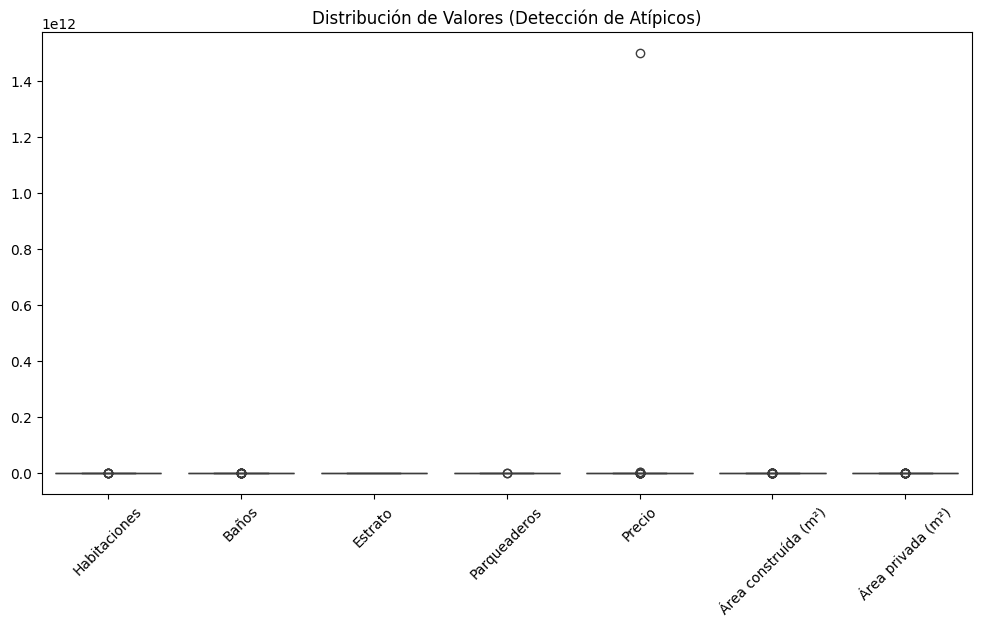

In [ ]:

# Verificar qué columnas existen en el DataFrame
colums_to = ['Habitaciones', 'Baños', 'Estrato', 'Parqueaderos', 'Precio', 'Área construída (m²)', 'Área privada (m²)']
colums_to = [col for col in colums_to if col in df]

# Limpiar y analizar las columnas
df[colums_to] = df[colums_to].apply(clean_numeric_column)

# Detectar valores atípicos
outliers, summary = detect_outliers_iqr(df, colums_to)

# Mostrar resumen de valores atípicos
print("Resumen de valores atípicos:")
summary_df = pd.DataFrame(summary).T
print(summary_df)

# Graficar valores atípicos
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[colums_to])
plt.xticks(rotation=45)
plt.title("Distribución de Valores (Detección de Atípicos)")
plt.show()

# Guardar los valores atípicos en un archivo CSV (opcional)
outlier_data = pd.concat(outliers.values(), axis=1)
outlier_data.to_csv("outliers_detectados.csv", index=False)

